In [48]:
%pip install obspy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

In [50]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [68]:
rows = cat[['filename', 'time_abs(%Y-%m-%dT%H:%M:%S.%f)']]
rows['search_time'] = pd.to_datetime(rows['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], format='%Y-%m-%dT%H:%M:%S.%f')
rows['search_time'] = rows['search_time'].dt.strftime('%Y-%m-%dT%H:%M')
rows


C:\Users\KeteMachavariani\AppData\Local\Temp\ipykernel_31536\2649155386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['search_time'] = pd.to_datetime(rows['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], format='%Y-%m-%dT%H:%M:%S.%f')
C:\Users\KeteMachavariani\AppData\Local\Temp\ipykernel_31536\2649155386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows['search_time'] = rows['search_time'].dt.strftime('%Y-%m-%dT%H:%M')


,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),search_time
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,1970-01-19T20:25
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,1970-03-25T03:32
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,1970-03-26T20:17
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,1970-04-25T01:14
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,1970-04-26T14:29
...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,1974-10-14T17:43
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,1975-04-12T18:15
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,1975-05-04T10:05
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,1975-06-24T16:03


In [52]:
import os
import pandas as pd

data_directory = './data/lunar/training/data/S12_GradeA'

dataframes = []

for filename in os.listdir(data_directory):
    if filename.endswith('.csv'):  # Adjust this based on your file type
        file_path = os.path.join(data_directory, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Optionally add a column for the filename
        df['filename'] = filename
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Combine all DataFrames into a single DataFrame (if needed)
combined_df = pd.concat(dataframes, ignore_index=True)

# Display the combined DataFrame (if desired)
combined_df


,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s),filename
0,1970-01-19T00:00:00.665000,0.000000,-6.153279e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv
1,1970-01-19T00:00:00.815943,0.150943,-7.701288e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv
2,1970-01-19T00:00:00.966887,0.301887,-8.396187e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv
3,1970-01-19T00:00:01.117830,0.452830,-8.096155e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv
4,1970-01-19T00:00:01.268774,0.603774,-7.097599e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv
...,...,...,...,...
43175424,1975-06-27T00:00:00.843887,86400.301887,-3.982647e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv
43175425,1975-06-27T00:00:00.994830,86400.452830,-5.580877e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv
43175426,1975-06-27T00:00:01.145774,86400.603774,-6.563002e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv
43175427,1975-06-27T00:00:01.296717,86400.754717,-3.281501e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv


In [69]:
combined_df['search_time'] = pd.to_datetime(combined_df['time_abs(%Y-%m-%dT%H:%M:%S.%f)'], format='%Y-%m-%dT%H:%M:%S.%f')
combined_df['search_time'] = combined_df['search_time'].dt.strftime('%Y-%m-%dT%H:%M')
combined_df

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s),filename,search_time,target
0,1970-01-19T00:00:00.665000,0.000000,-6.153279e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv,1970-01-19T00:00,0
1,1970-01-19T00:00:00.815943,0.150943,-7.701288e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv,1970-01-19T00:00,0
2,1970-01-19T00:00:00.966887,0.301887,-8.396187e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv,1970-01-19T00:00,0
3,1970-01-19T00:00:01.117830,0.452830,-8.096155e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv,1970-01-19T00:00,0
4,1970-01-19T00:00:01.268774,0.603774,-7.097599e-14,xa.s12.00.mhz.1970-01-19HR00_evid00002.csv,1970-01-19T00:00,0
...,...,...,...,...,...,...
43175424,1975-06-27T00:00:00.843887,86400.301887,-3.982647e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv,1975-06-27T00:00,0
43175425,1975-06-27T00:00:00.994830,86400.452830,-5.580877e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv,1975-06-27T00:00,0
43175426,1975-06-27T00:00:01.145774,86400.603774,-6.563002e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv,1975-06-27T00:00,0
43175427,1975-06-27T00:00:01.296717,86400.754717,-3.281501e-16,xa.s12.00.mhz.1975-06-26HR00_evid00198.csv,1975-06-27T00:00,0


In [70]:
combined_df['target'] = combined_df['search_time'].isin(rows['search_time']).astype(int)

In [71]:
combined_df['target'].sum()

34187

In [72]:
print(combined_df[combined_df['target'] == 1]['velocity(m/s)'].max())
print(combined_df[combined_df['target'] == 1]['velocity(m/s)'].min())
print(combined_df[combined_df['target'] == 1]['velocity(m/s)'].std())
print(combined_df[combined_df['target'] == 1]['velocity(m/s)'].median())
print(combined_df[combined_df['target'] == 1]['velocity(m/s)'].mean())

7.505331965579423e-09
-7.473998044794969e-09
5.855287149826721e-10
4.97008240526126e-14
7.422337697242009e-13


In [73]:
temp_df = combined_df.copy()

In [74]:
print(combined_df.shape)
temp_df.shape

(43175429, 6)


(43175429, 6)

In [59]:
threshold = 4.377535001313185e-11 - 2 * 4.972905031017656e-10
filtered_df = combined_df[combined_df['velocity(m/s)'] >= threshold]
# combined_df.loc[combined_df['velocity(m/s)'] < threshold, 'velocity(m/s)'] = 0

c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


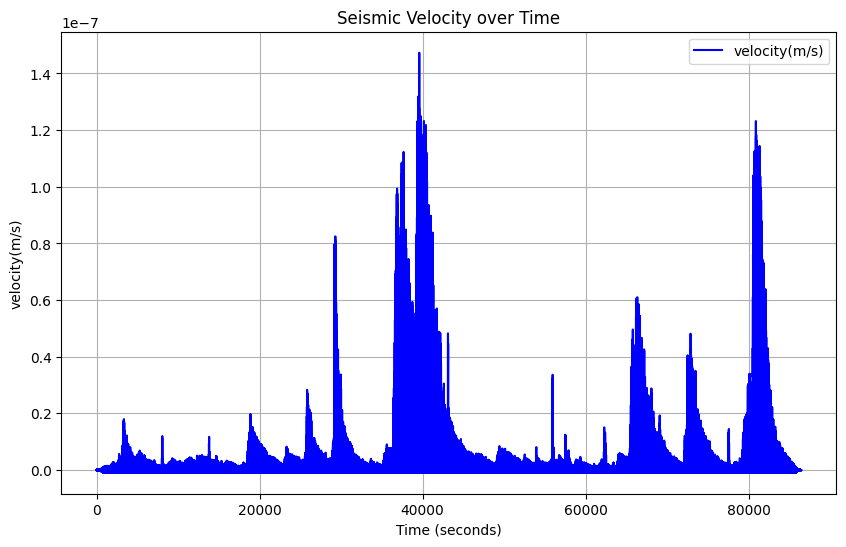

In [60]:
import matplotlib.pyplot as plt

# Plot the velocity over time (time_rel)
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['time_rel(sec)'], filtered_df['velocity(m/s)'], label='velocity(m/s)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('velocity(m/s)')
plt.title('Seismic Velocity over Time')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


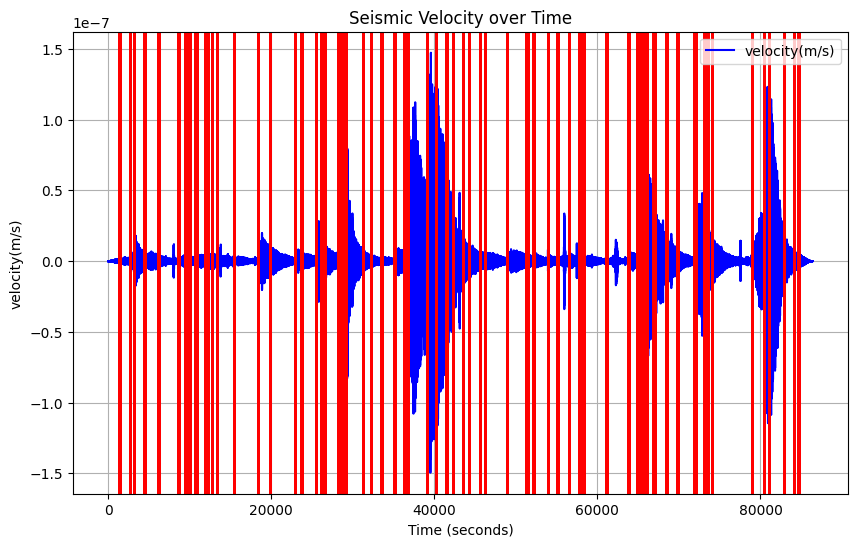

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(combined_df['time_rel(sec)'], combined_df['velocity(m/s)'], label='velocity(m/s)', color='blue')
plt.xlabel('Time (seconds)')
plt.ylabel('velocity(m/s)')
plt.title('Seismic Velocity over Time')

for index, row in combined_df[combined_df['target'] == 1].iterrows():
    plt.axvline(x=row['time_rel(sec)'], color='red', linestyle='-', linewidth=2)

plt.legend()
plt.grid(True)
plt.show()


In [77]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split

X = combined_df[['velocity(m/s)']]
y = combined_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.00
Recall: 0.00


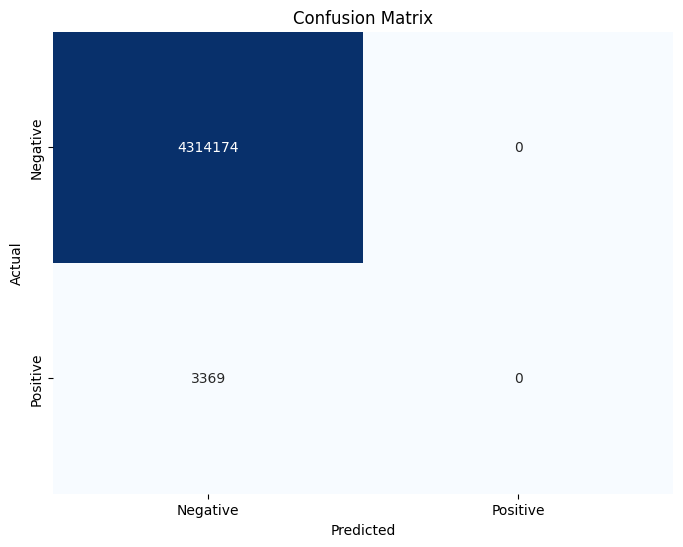

c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4314174
           1       0.00      0.00      0.00      3369

    accuracy                           1.00   4317543
   macro avg       0.50      0.50      0.50   4317543
weighted avg       1.00      1.00      1.00   4317543



c:\Users\KeteMachavariani\Desktop\space_apps_2024_seismic_detection\space_apps_2024_seismic_detection\venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Create an XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))
